In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from scipy import linalg as LA

In [29]:
#Create 50 independet MLPs with 1 hidden layer of 10 neurons and 1 output neuron
def MLP_1(x,n,MLP_no):
    '''Compute Output for MLP with 1 hidden layer of 10 neurons and 1 output neuron'''
    #initialize weights
    #seed the random number generator
    np.random.seed(MLP_no+100)
    w21 = np.random.normal(0, 1, (10, 1))
    w10 = np.random.normal(0, n, (10, 1))
    w20 = np.random.uniform(-2, 2, (10, 1))
    
    #Compute input for first hidden layer
    h = w10@x - w20
    #Compute activation for hidden layer
    f_h = np.tanh(h)
    #Compute output
    output = w21.T@f_h
    
    return output

In [30]:

x = np.linspace(-2,2,100).reshape(100,1)

#Add 50 columns for outputs
input_output1 = np.append(x, np.zeros((100,50)), axis=1)
input_output2 = np.append(x, np.zeros((100,50)), axis=1)

for MLP_no in np.arange(start = 1, stop = 51):
    for i in range(len(x)):
        output1 = MLP_1(x[i].reshape(1,1),2, MLP_no)
        output2 = MLP_1(x[i].reshape(1,1),0.5, MLP_no)
        input_output1[i,MLP_no] = output1
        input_output2[i,MLP_no] = output2


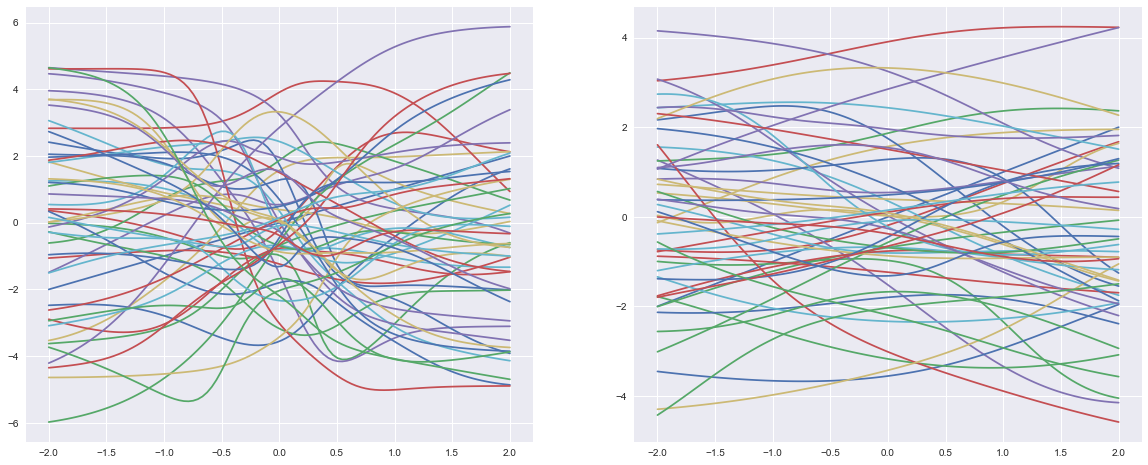

In [31]:
number_of_MLPs = np.shape(input_output1)[1]

fig = plt.figure(figsize=(20,8))

#Plot output of all 50 MLPs with initialization 1
ax1 = fig.add_subplot(1,2,1)
for i in np.arange(number_of_MLPs):
    plt.plot(input_output1[:,0], input_output1[:,i])
    
#Plot output of all 50 MLPs with initialization 2
ax2 = fig.add_subplot(1,2,2)
number_of_MLPs = np.shape(input_output2)[1]

for i in np.arange(number_of_MLPs):
    plt.plot(input_output2[:,0], input_output2[:,i])
    
plt.show()

*Compute the mean squared error (MSE) between each of these 2 × 50 (50 from each of the above two initialization procedures) input-output functions and the function g(x) = −x. For each of the two initialization procedures, which MLP approximates g best? Plot y(x) vs. x for these two MLPs
*

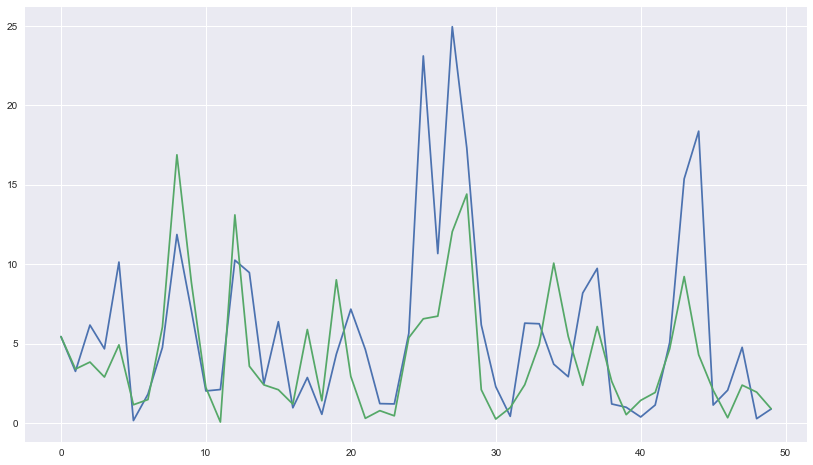

In [32]:
from sklearn.metrics import mean_squared_error

number_of_MLPs = np.shape(input_output1)[1]-1

g_function = x*-1
mse_1 = np.zeros([50,1])
mse_2 = np.zeros([50,1])

fig = plt.figure(figsize=(14,8))

for i in np.arange(number_of_MLPs)-1:
    mse_1[i] = mean_squared_error(g_function, input_output1[:,i])
    mse_2[i] = mean_squared_error(g_function, input_output2[:,i])

plt.plot((np.arange(number_of_MLPs)), mse_1)
plt.plot((np.arange(number_of_MLPs)), mse_2)

plt.show()


In [33]:
class MLP:
    
    def _init_(self, inputs, hidden, outputs, learning_rate=0.001):
        '''Compute Output for MLP with 1 hidden layer of 10 neurons and 1 output neuron'''
        
        #initialize weights
        self.inputs = inputs
        self.hidden = hidden
        self.hidden = hidden
        self.outputs = outputs
        
        layers = [self.inputs, self.hidden, self.outputs]
        
        #seed the random number generator
        self.weights = []
        
        # for i in range(len(layers)-1):
        #     np.random.seed(10)
        #     w = np.random.uniform(-0.5, 0.5, (layers[i], layers[i+1]))
        #     self.weights.append(w)
            
        def forward_propagate(self, inputs):
            activations = inputs
            
            for w in self.weights:
                net_inputs = np.dot(activations, w)
                activations = self._tanh(net_inputs)
                
            return activations
        
        def _tanh(self, x):
            return np.tanh(x)
        
        #Compute output
        self.output 
        

mlp = MLP(1, 10,)


TypeError: MLP() takes no arguments

In [ ]:
#fetch data from dataset
from numpy import genfromtxt
data = genfromtxt('RegressionData.csv', delimiter=' ')


#(A) Initialization:
#Initial weights from input node to hidden layer incl. bias (shape: 3,2)
w01_bias = np.random.uniform(-0.5, 0.5, (3, 2))
#Initial weights from hidden layer to output neuron incl. bias
w12_bias = np.random.uniform(-0.5, 0.5, (1,4))


#(B) Iterative learning:
#Innitialize
nu = 0.5
gradient01 = np.zeros([10,3])
gradient12 = np.zeros([10,3])

for i in np.arange(data.shape[0]):
    #(a) Forward Propagation:
    x = data[i, 0].reshape(1,1)
    y = data[i, 1]
    #prepend bias term (shape: 2,1)
    x_bias = np.insert(x, 0, 1)
    #Calculate input of hidden layer (shape: 3,1)
    hidden_input = w01_bias @ x_bias
    #Calculate output of hidden layer
    hidden_output = np.tanh(hidden_input)
    #Prepend bias term
    hidden_output_bias = np.insert(hidden_output,0,1)
    #Calculate input=output of output neuron
    outputneuron = w12_bias @ hidden_output_bias

    error = 0.5*np.square(outputneuron - y)

    #Backward pass
    delta_output = 1
    delta_hidden = np.dot((1 - np.tanh(hidden_output_bias[1::])), np.sum(w12_bias[0][1:4]))

    gradient01[i,:] = -nu*(outputneuron - y)*delta_hidden*np.tanh(x)
    gradient12[i,:] = -nu*(outputneuron - y)*delta_output*np.tanh(hidden_input)

gradient01 = np.sum(gradient01, axis = 0)/10
gradient12 = np.sum(gradient12, axis = 0)/10